In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import torch
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from lib.modules import (
    evaluate_loop, 
    read_and_window_session,
    read_session,
    train_loop,
    optimization_loop
)
from lib.utils import (
    plot_and_save_cm,
    summary
)
from lib.models import  MLP, MLP2hl
from tqdm import tqdm
import plotly.express as px
from tabulate import tabulate

In [7]:
raw_dir = Path("/home/mmazeem/datasets/nursingv1")
label_dir = Path("/home/mmazeem/datasets/eating_labels")
WINSIZE = 101
DEVICE = 'cuda'

In [31]:
train_sessions = [25, 67]
test_sessions = [58, 62]

Xs = []
ys = []

for session_idx in train_sessions:
    X,y = read_and_window_session(session_idx, WINSIZE, raw_dir, label_dir)

    Xs.append(X)
    ys.append(y)

Xtr = torch.cat(Xs)
ytr = torch.cat(ys)

Xs = []
ys = []

for session_idx in test_sessions:
    X,y = read_and_window_session(session_idx, WINSIZE, raw_dir, label_dir)

    Xs.append(X)
    ys.append(y)

Xte = torch.cat(Xs)
yte = torch.cat(ys)

In [38]:
model = MLP2hl([20,20], WINSIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 9: Train Loss: 0.2044: 100%|██████████| 10/10 [01:10<00:00,  7.01s/it]


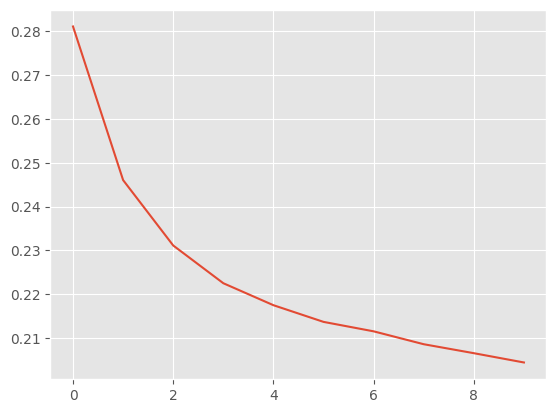

In [39]:
trainloader = DataLoader(TensorDataset(Xtr,ytr), batch_size=64, shuffle=True)

train_loop(model, trainloader, criterion, optimizer, 10, DEVICE)

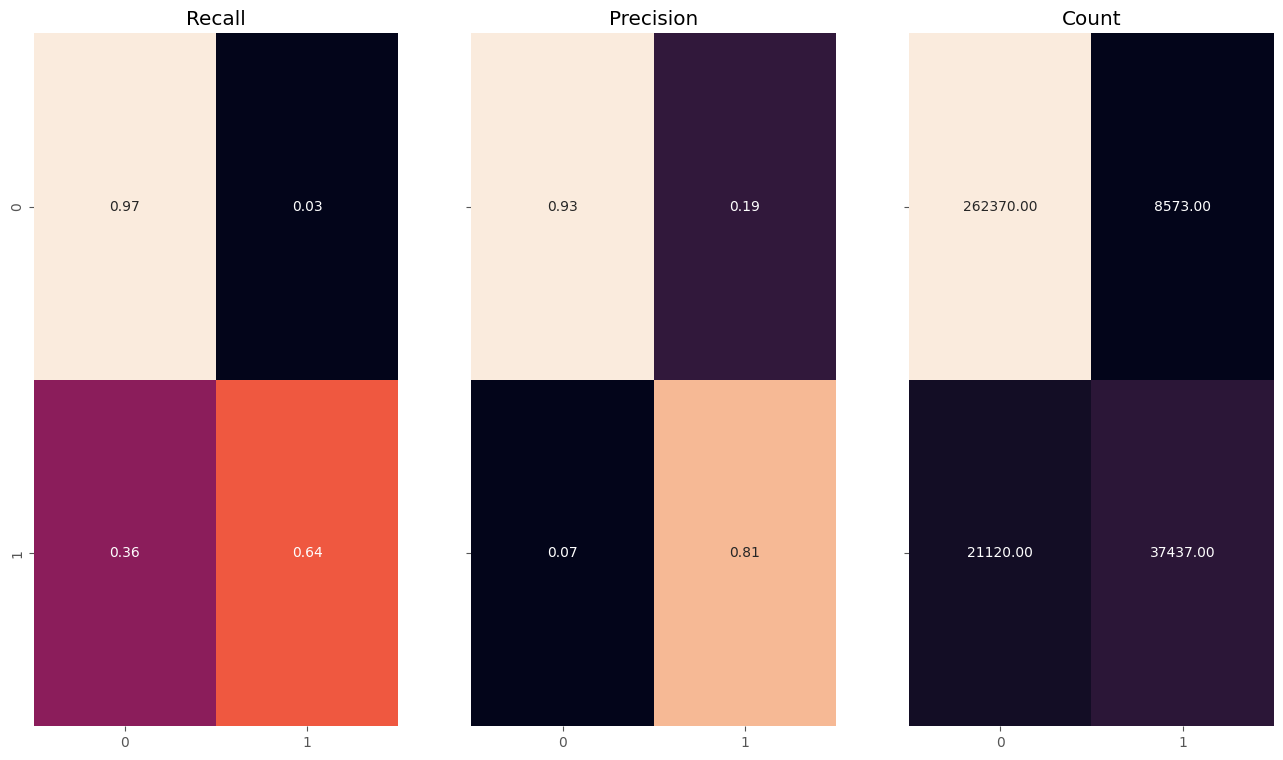

Metric        Value
---------  --------
loss       0.206146
precision  0.813671
recall     0.639326
f1         0.716039


In [40]:
metrics = evaluate_loop(model, criterion, trainloader, DEVICE, metrics=True)
plot_and_save_cm(metrics['true'], metrics['pred'])
summary(metrics)

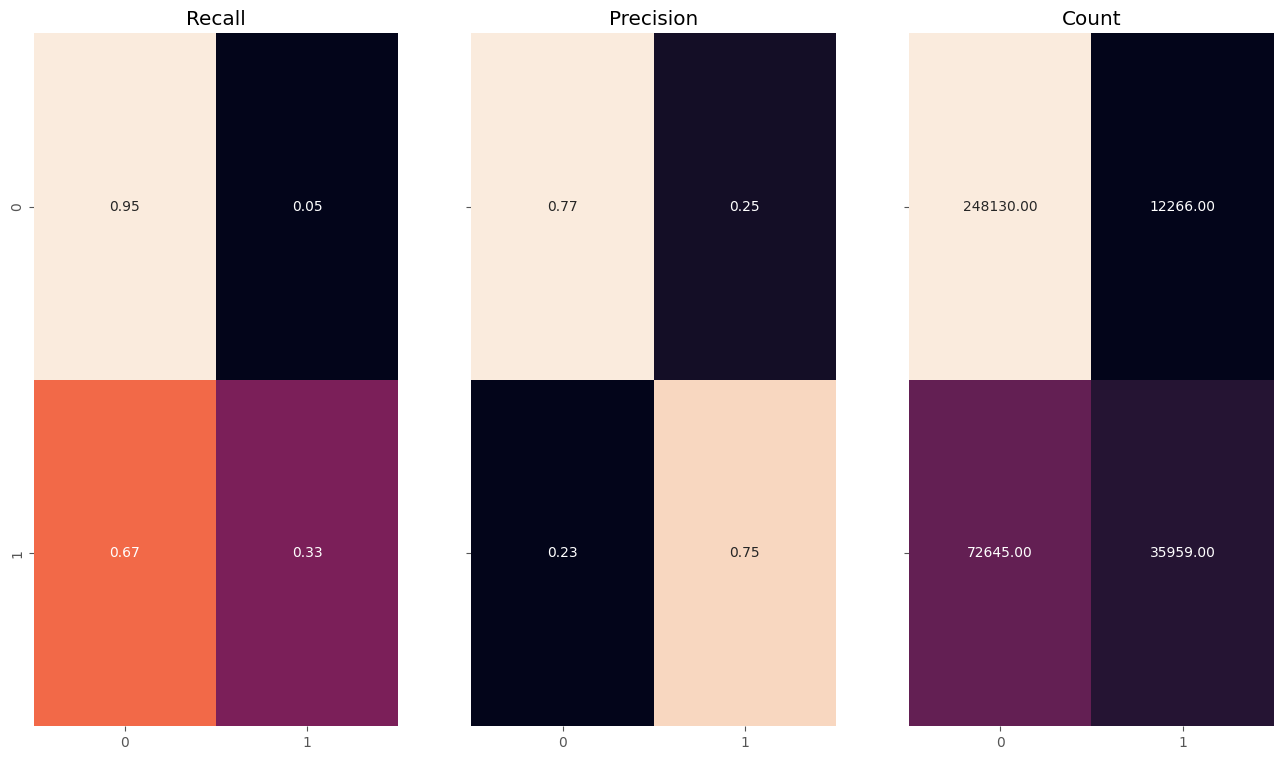

Metric        Value
---------  --------
loss       0.980122
precision  0.745651
recall     0.331102
f1         0.458576


In [41]:
testloader = DataLoader(TensorDataset(Xte,yte), batch_size=64)

metrics = evaluate_loop(model, criterion, testloader, DEVICE, metrics=True)
plot_and_save_cm(metrics['true'], metrics['pred'])
summary(metrics)

In [43]:
test_session = test_sessions[1]

test_to_plot = read_session(test_session, raw_dir)
Xtest, ytest = read_and_window_session(test_session, WINSIZE, raw_dir, label_dir)
metrics = evaluate_loop(
    model, 
    criterion, 
    DataLoader(TensorDataset(Xtest, ytest), batch_size=64), 
    DEVICE, 
    metrics=True
)
summary(metrics)

test_to_plot['y_true'] = metrics['true']
test_to_plot['y_pred'] = metrics['pred'] * 2

fig = px.line(test_to_plot[::5], x=test_to_plot.index[::5], y=['x_acc','y_acc','z_acc', 'y_true', 'y_pred'])
fig.show(renderer='browser')

Metric        Value
---------  --------
loss       1.42334
precision  0.796211
recall     0.436188
f1         0.563612


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/mmazeem/snap/code/common/.cache/gio-modules/libgiolibproxy.so
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/mmazeem/snap/code/common/.cache/gio-modules/libgiolibproxy.so


Opening in existing browser session.
